In [5]:
import pandas as pd
import numpy as np
import datetime

file_to_load = 'JEOPARDY_CSV.csv'

jeopardy_df = pd.read_csv(file_to_load)
jeopardy_df.head()


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [6]:
jeopardy_df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [7]:
# 1b cleaning the data
# strip the column names of spaces and make sure to assign them back to the columns
# otherwise you are not actually changing the column names

jeopardy_df.columns= jeopardy_df.columns.str.rstrip()
jeopardy_df.columns= jeopardy_df.columns.str.lstrip()

In [8]:
jeopardy_df.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [9]:
jeopardy_df.describe() # 1a there are 216930 rows, each row is a question from an episode of Jeopardy
# the grain is the granularity of the data or the level of detail that is stored so for this it would be the question

,Show Number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000


In [10]:
jeopardy_df['year'] = pd.DatetimeIndex(jeopardy_df['Air Date']).year
print(jeopardy_df.head())
print(jeopardy_df.tail())

   Show Number    Air Date      Round                         Category  Value  \
0         4680  12/31/2004  Jeopardy!                          HISTORY  $200    
1         4680  12/31/2004  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES  $200    
2         4680  12/31/2004  Jeopardy!      EVERYBODY TALKS ABOUT IT...  $200    
3         4680  12/31/2004  Jeopardy!                 THE COMPANY LINE  $200    
4         4680  12/31/2004  Jeopardy!              EPITAPHS & TRIBUTES  $200    

                                            Question      Answer  year  
0  For the last 8 years of his life, Galileo was ...  Copernicus  2004  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  2004  
2  The city of Yuma in this state has a record av...     Arizona  2004  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  2004  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  2004  
        Show Number   Air Date             Round                Category  \

In [11]:
# 1c unique shows per year
unique_shows_year = pd.Series(jeopardy_df.groupby('year')['Show Number'].nunique())
print(unique_shows_year)

year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64


In [55]:
# 1d number of times each category was used
top_cat_df = pd.DataFrame(jeopardy_df['Category'].value_counts())
top_cat_df

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
MASS COMMUNICATION,1
INTERNATIONAL AUTHORS,1
INTERNATIONAL LANDMARKS,1
NONFICTION AUTHORS,1


In [54]:
# top 5 categories
top_cat_df = pd.DataFrame(jeopardy_df['Category'].value_counts())
top_five = top_cat_df.head()
top_five

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


In [22]:
jeopardy_df['month'] = pd.DatetimeIndex(jeopardy_df['Air Date']).month
print(jeopardy_df.head())
print(jeopardy_df.tail())

   Show Number    Air Date      Round                         Category  Value  \
0         4680  12/31/2004  Jeopardy!                          HISTORY  $200    
1         4680  12/31/2004  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES  $200    
2         4680  12/31/2004  Jeopardy!      EVERYBODY TALKS ABOUT IT...  $200    
3         4680  12/31/2004  Jeopardy!                 THE COMPANY LINE  $200    
4         4680  12/31/2004  Jeopardy!              EPITAPHS & TRIBUTES  $200    

                                            Question      Answer  year  month  
0  For the last 8 years of his life, Galileo was ...  Copernicus  2004     12  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  2004     12  
2  The city of Yuma in this state has a record av...     Arizona  2004     12  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  2004     12  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  2004     12  
        Show Number   Air Date   

In [26]:
# unique shows per month = November has the most
unique_shows_month = pd.Series(jeopardy_df.groupby('month')['Show Number'].nunique())
print(unique_shows_month)

month
1     355
2     293
3     329
4     330
5     351
6     321
7     256
9     272
10    347
11    434
12    352
Name: Show Number, dtype: int64


In [27]:
# 1e what month has the most shows: November
jeopardy_df['month'].value_counts()

11    25672
1     21128
5     21052
12    20875
10    20510
3     19731
4     19654
6     19331
2     17501
9     16053
7     15423
Name: month, dtype: int64

In [28]:
jeopardy_df['Answer'].value_counts()

China                              216
Australia                          215
Japan                              196
Chicago                            194
France                             193
                                  ... 
Alex DeLarge                         1
Alabama, Iowa, Pennsylvania          1
Swallows                             1
Jet Propulsion Laboratory (JPL)      1
a hundredth of a second              1
Name: Answer, Length: 88236, dtype: int64

In [53]:
# 1f questions for top 3 answers
array = ['China', 'Australia', 'Japan']
jeopardy_df.loc[jeopardy_df['Answer'].isin(array)]


,Show Number,Air Date,Round,Category,Value,Question,Answer,year,month
404,2825,12/6/1996,Double Jeopardy!,HISTORY,$600,In February 1904 this country attacked the Rus...,Japan,1996,12
560,3036,11/10/1997,Jeopardy!,AT THE KENNEDY CENTER,$500,A 1994 festival honoring this country featured...,Australia,1997,11
598,4107,6/11/2002,Jeopardy!,REMEMBER THE TIME,$200,In 1958 this country launched its second 5-yea...,China,2002,6
688,2735,6/21/1996,Double Jeopardy!,WORLD GEOGRAPHY,$200,Large aboriginal populations live in this coun...,Australia,1996,6
874,4541,5/10/2004,Double Jeopardy!,GROSS NATIONAL PRODUCTS,"$1,200",Sanma aisu is fish-flavored ice cream & taco a...,Japan,2004,5
...,...,...,...,...,...,...,...,...,...
215568,3589,3/23/2000,Jeopardy!,BEER COUNTRY OF ORIGIN,$400,Kirin,Japan,2000,3
215912,6003,10/20/2010,Final Jeopardy!,COUNTRY DEMOGRAPHICS,None,"Because of a policy adopted in 1979, this coun...",China,2010,10
216044,4364,7/17/2003,Jeopardy!,"MONEY, MONEY, MONEY",$600,Norfolk Island & the Republic of Kiribati use ...,Australia,2003,7
216150,1983,3/31/1993,Jeopardy!,FASHION,$100,Colorful patches called p'u-fang used to indic...,China,1993,3


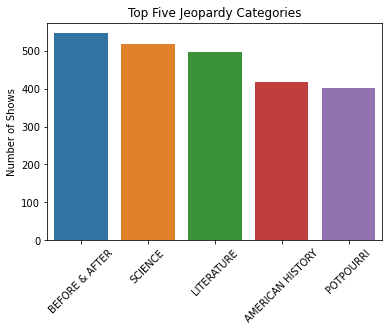

In [56]:
# Create a visualization to show the top 5 categories
import matplotlib.pyplot as plt
import seaborn as sns
top_five_bar = sns.barplot(x=top_five.index, y='Category', data=top_five)
top_five_bar.set(title="Top Five Jeopardy Categories", ylabel="Number of Shows")
plt.xticks(rotation=45)
plt.show()